<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 15px; height: 80px">

# Project 2

### Exploratory Data Analysis (EDA)

---

Your hometown mayor just created a new data analysis team to give policy advice, and the administration recruited _you_ via LinkedIn to join it. Unfortunately, due to budget constraints, for now the "team" is just you...

The mayor wants to start a new initiative to move the needle on one of two separate issues: high school education outcomes, or drug abuse in the community.

Also unfortunately, that is the entirety of what you've been told. And the mayor just went on a lobbyist-funded fact-finding trip in the Bahamas. In the meantime, you got your hands on two national datasets: one on SAT scores by state, and one on drug use by age. Start exploring these to look for useful patterns and possible hypotheses!

---

This project is focused on exploratory data analysis, aka "EDA". EDA is an essential part of the data science analysis pipeline. Failure to perform EDA before modeling is almost guaranteed to lead to bad models and faulty conclusions. What you do in this project are good practices for all projects going forward, especially those after this bootcamp!

This lab includes a variety of plotting problems. Much of the plotting code will be left up to you to find either in the lecture notes, or if not there, online. There are massive amounts of code snippets either in documentation or sites like [Stack Overflow](https://stackoverflow.com/search?q=%5Bpython%5D+seaborn) that have almost certainly done what you are trying to do.

**Get used to googling for code!** You will use it every single day as a data scientist, especially for visualization and plotting.

#### Package imports

In [75]:
import numpy as np
import scipy.stats as stats
import csv
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn-ticks')


# this line tells jupyter notebook to put the plots in the notebook rather than saving them to file.
%matplotlib inline

# this line makes plots prettier on mac retina screens. If you don't have one it shouldn't do anything.
%config InlineBackend.figure_format = 'retina'

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 1. Load the `sat_scores.csv` dataset and describe it

---

You should replace the placeholder path to the `sat_scores.csv` dataset below with your specific path to the file.

### 1.1 Load the file with the `csv` module and put it in a Python dictionary

The dictionary format for data will be the column names as key, and the data under each column as the values.

Toy example:
```python
data = {
    'column1':[0,1,2,3],
    'column2':['a','b','c','d']
    }
```

In [165]:
raw_csv = ''
csv_file = 'sat_scores.csv'

with open(csv_file, 'r') as f:
    raw_csv = f.read()
    
cleaned = [[int(tag) if tag.isdigit() else tag for tag in elements] for elements in [line.split(',') for line in raw_csv.splitlines()]]

SAT = {}

#Cast to Dict SAT
for idx, header in enumerate(cleaned[0]):
    SAT[header] = [elements[idx] for elements in [line for line in cleaned[1:-1]]] #first is header titles, last is Sum Mean
    #SAT[header] = [elements[idx] for elements in [line for line in cleaned][1:]] #first is header titles, last is Sum Mean
    
print(SAT)


{'Math': [510, 513, 515, 505, 516, 499, 499, 506, 500, 501, 499, 510, 499, 489, 501, 488, 474, 526, 499, 527, 499, 515, 510, 517, 525, 515, 542, 439, 539, 512, 542, 553, 542, 589, 550, 545, 572, 589, 580, 554, 568, 561, 577, 562, 596, 550, 570, 603, 582, 599, 551], 'State': ['CT', 'NJ', 'MA', 'NY', 'NH', 'RI', 'PA', 'VT', 'ME', 'VA', 'DE', 'MD', 'NC', 'GA', 'IN', 'SC', 'DC', 'OR', 'FL', 'WA', 'TX', 'HI', 'AK', 'CA', 'AZ', 'NV', 'CO', 'OH', 'MT', 'WV', 'ID', 'TN', 'NM', 'IL', 'KY', 'WY', 'MI', 'MN', 'KS', 'AL', 'NE', 'OK', 'MO', 'LA', 'WI', 'AR', 'UT', 'IA', 'SD', 'ND', 'MS'], 'Rate': [82, 81, 79, 77, 72, 71, 71, 69, 69, 68, 67, 65, 65, 63, 60, 57, 56, 55, 54, 53, 53, 52, 51, 51, 34, 33, 31, 26, 23, 18, 17, 13, 13, 12, 12, 11, 11, 9, 9, 9, 8, 8, 8, 7, 6, 6, 5, 5, 4, 4, 4], 'Verbal': [509, 499, 511, 495, 520, 501, 500, 511, 506, 510, 501, 508, 493, 491, 499, 486, 482, 526, 498, 527, 493, 485, 514, 498, 523, 509, 539, 534, 539, 527, 543, 562, 551, 576, 550, 547, 561, 580, 577, 559, 562, 5

### 1.2 Make a pandas DataFrame object with the SAT dictionary, and another with the pandas `.read_csv()` function

Compare the DataFrames using the `.dtypes` attribute in the DataFrame objects. What is the difference between loading from file and inputting this dictionary (if any)?

In [166]:
df_from_dict = pd.DataFrame(SAT)

df_from_dict

cols = df_from_dict.columns.tolist()

cols = ['State', 'Rate', 'Verbal', 'Math']
df_from_dict = df_from_dict[cols]

df_from_dict

,State,Rate,Verbal,Math
0,CT,82,509,510
1,NJ,81,499,513
2,MA,79,511,515
3,NY,77,495,505
4,NH,72,520,516
5,RI,71,501,499
6,PA,71,500,499
7,VT,69,511,506
8,ME,69,506,500
9,VA,68,510,501


In [167]:
df = pd.DataFrame(pd.read_csv(csv_file))

df.dtypes

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 4 columns):
State     52 non-null object
Rate      52 non-null int64
Verbal    52 non-null int64
Math      52 non-null int64
dtypes: int64(3), object(1)
memory usage: 1.7+ KB


In [79]:
# 1) The headers are objects, can be a mix of types.
# 2) By default integers are equivalent to a Long
# 3) Pandas read_csv disregards the '' or ""
# 4) DF index still starts from 0
# 5) Auto assign headers based on the first row , IF not specified, and creates a new index.
# 6) Column order may be affected as dicts are unordered

In [ ]:
df = df[:-1] #last row is the summary row

In [172]:
df.info()

df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 4 columns):
State     51 non-null object
Rate      51 non-null int64
Verbal    51 non-null int64
Math      51 non-null int64
dtypes: int64(3), object(1)
memory usage: 1.7+ KB


51

If you did not convert the string column values to float in your dictionary, the columns in the DataFrame are of type `object` (which are string values, essentially). 

### 1.3 Look at the first ten rows of the DataFrame: what does our data describe?

From now on, use the DataFrame loaded from the file using the `.read_csv()` function.

Use the `.head(num)` built-in DataFrame function, where `num` is the number of rows to print out.

You are not given a "codebook" with this data, so you will have to make some (very minor) inference.

In [81]:
df.head(10)

#df.head(10).describe()
# 1) Arranged in descending of Rate
# 2) Other missing factors to calculate Rate

,State,Rate,Verbal,Math
0,CT,82,509,510
1,NJ,81,499,513
2,MA,79,511,515
3,NY,77,495,505
4,NH,72,520,516
5,RI,71,501,499
6,PA,71,500,499
7,VT,69,511,506
8,ME,69,506,500
9,VA,68,510,501


<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 2. Create a "data dictionary" based on the data

---

A data dictionary is an object that describes your data. This should contain the name of each variable (column), the type of the variable, your description of what the variable is, and the shape (rows and columns) of the entire dataset.

In [82]:
# print(df.info())
# print(df.shape)
# print(df.describe())
# print(df.columns)

df[df.State == 'FL']
# Rate may be some sort of ranking based on Math and Verbal
#http://www.softschools.com/social_studies/state_abbreviations/

,State,Rate,Verbal,Math
18,FL,54,498,499


<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 3. Plot the data using seaborn

---

### 3.1 Using seaborn's `distplot`, plot the distributions for each of `Rate`, `Math`, and `Verbal`

Set the keyword argument `kde=False`. This way you can actually see the counts within bins. You can adjust the number of bins to your liking. 

[Please read over the `distplot` documentation to learn about the arguments and fine-tune your chart if you want.](https://stanford.edu/~mwaskom/software/seaborn/generated/seaborn.distplot.html#seaborn.distplot)

Text(0.5,0.98,u'Distributions')

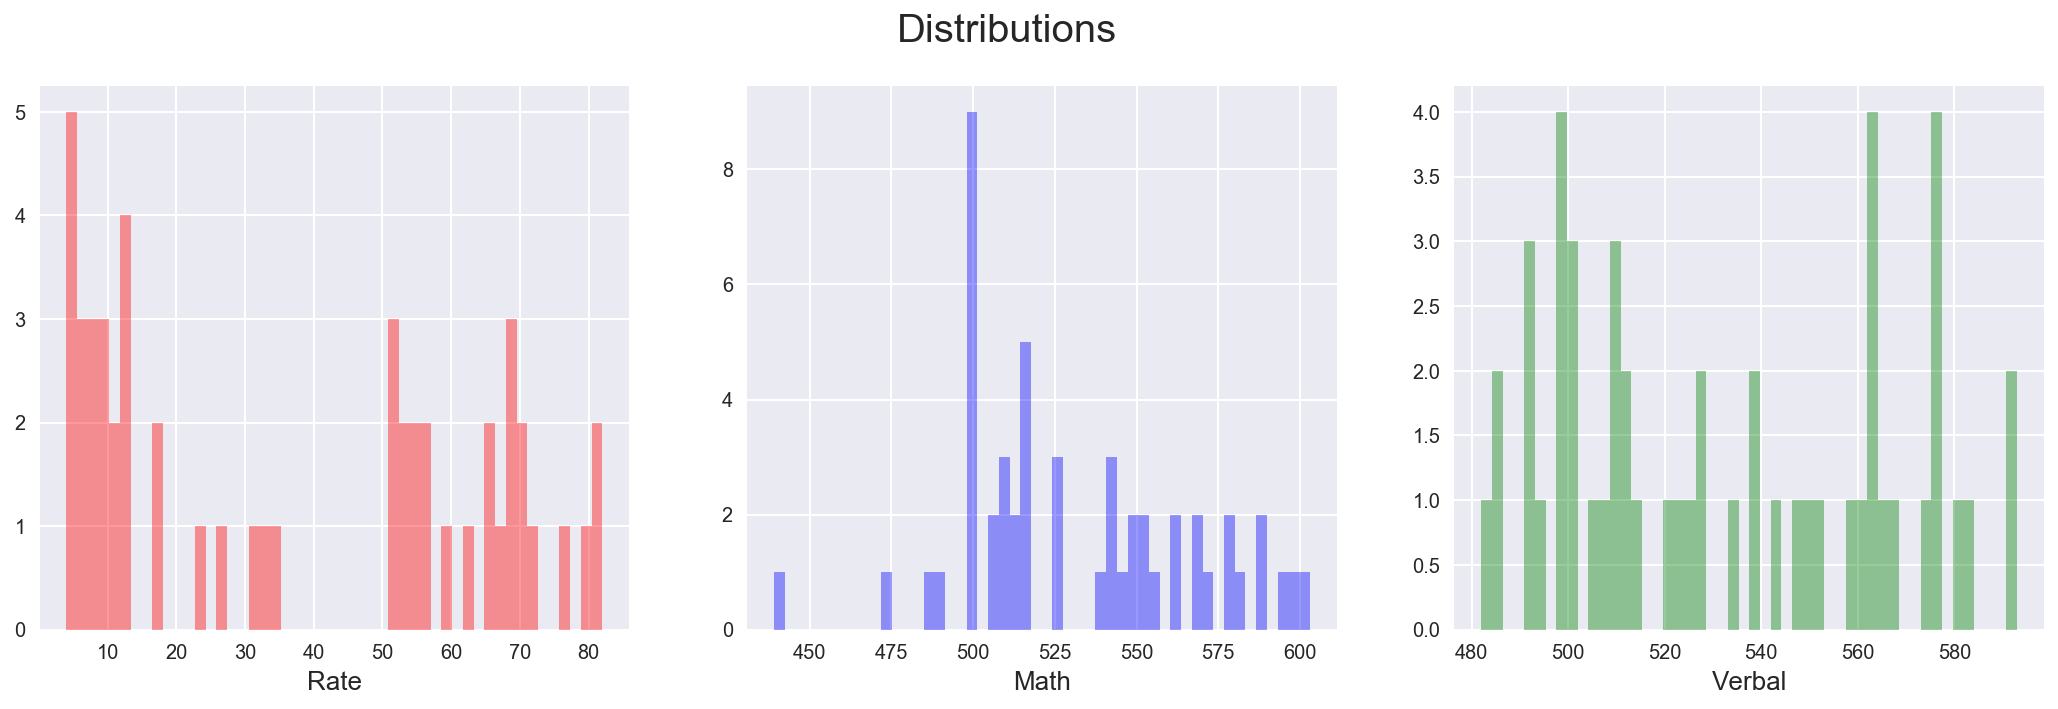

In [83]:
sns.set_style("ticks")
plt.style.use('seaborn-darkgrid')

figuresize = (16, 5)
fig, ax = plt.subplots(1,3, figsize=figuresize)
a1 = sns.distplot(df['Rate'], bins=50, kde=False, ax=ax[0], color='red')
a1.set_xlabel('Rate', fontsize=13)
a2 = sns.distplot(df['Math'], bins=50, kde=False, ax=ax[1], color='blue')
a2.set_xlabel('Math', fontsize=13)
a3 = sns.distplot(df['Verbal'], bins=50, kde=False, ax=ax[2], color='green')
a3.set_xlabel('Verbal', fontsize=13)

plt.suptitle('Distributions', fontsize=20)
#plt.tight_layout()

Text(0.5,1,u'Distribution of Rate')

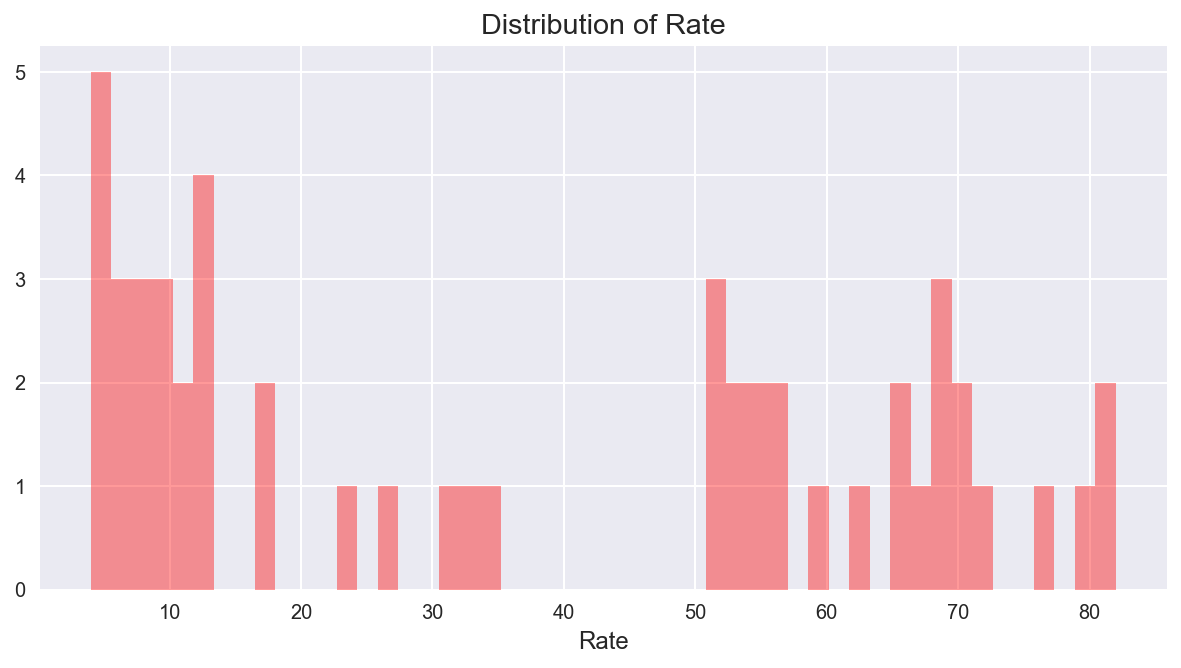

In [84]:
fig, ax = plt.subplots(figsize=(9, 5))
ax = sns.distplot(df['Rate'], bins=50, kde=False, color='red')
ax.set_title('Distribution of Rate')

Text(0.5,1,u'Distribution of Math')

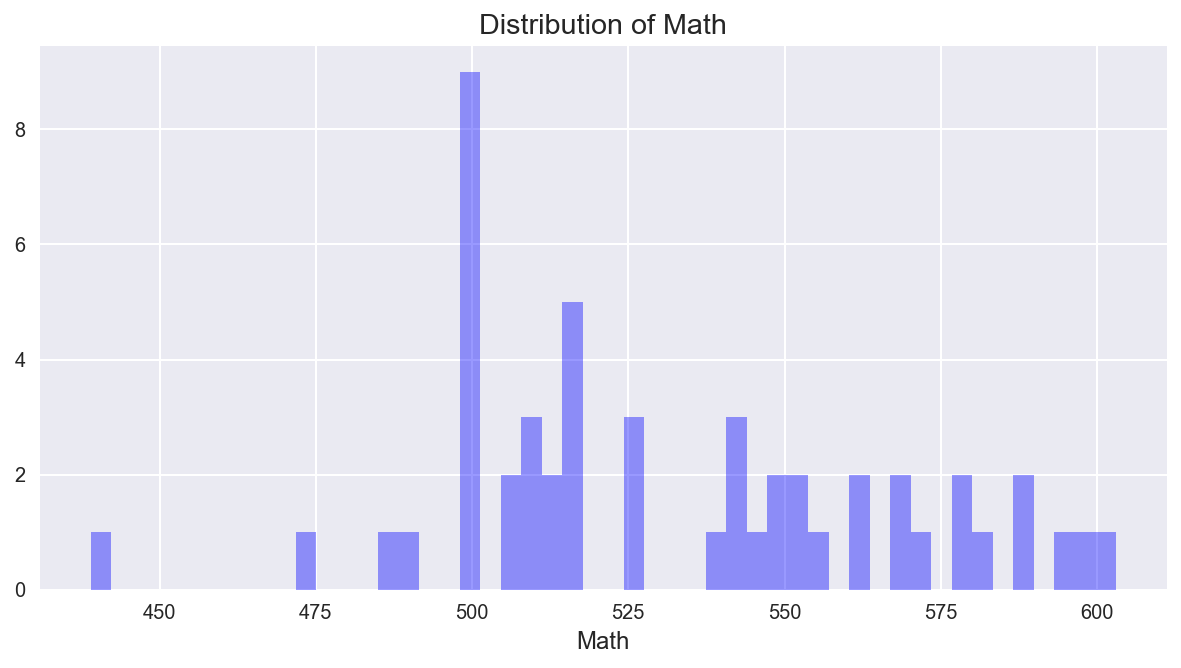

In [85]:
fig, ax = plt.subplots(figsize=(9, 5))
ax = sns.distplot(df['Math'], bins=50, kde=False, color='blue')
ax.set_title('Distribution of Math')

Text(0.5,1,u'Distribution of Verbal')

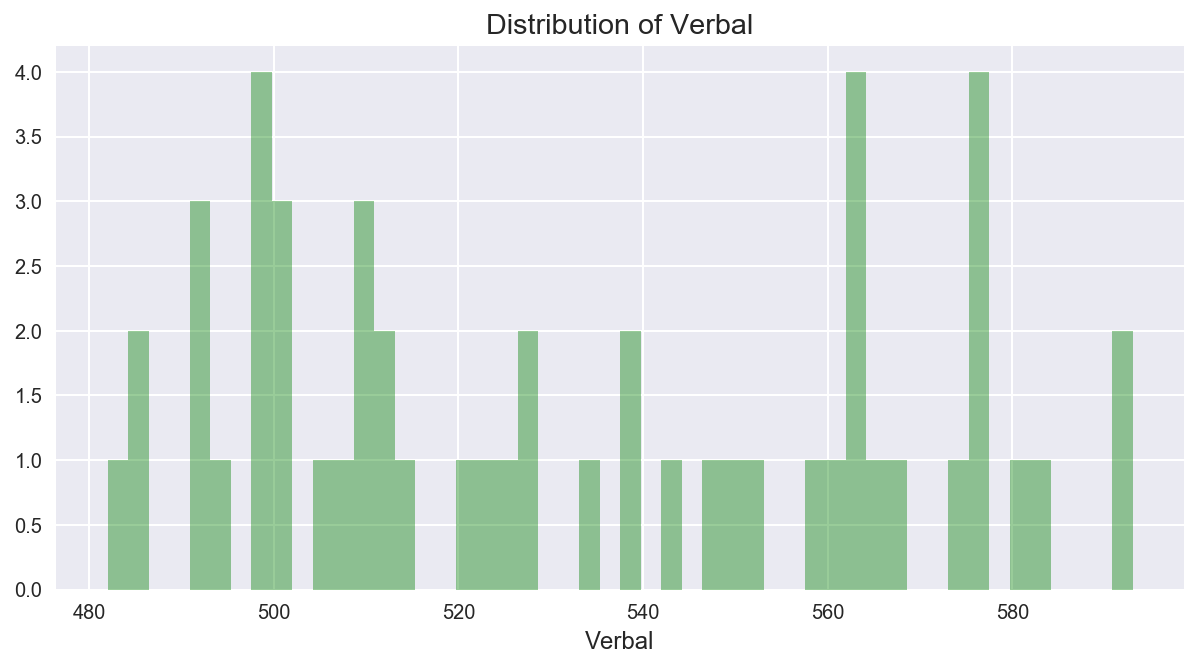

In [86]:
fig, ax = plt.subplots(figsize=(9, 5))
ax = sns.distplot(df['Verbal'], bins=50, kde=False, color='green')
ax.set_title('Distribution of Verbal')

### 3.2 Using seaborn's `pairplot`, show the joint distributions for each of `Rate`, `Math`, and `Verbal`

Explain what the visualization tells you about your data.

[Please read over the `pairplot` documentation to fine-tune your chart.](https://stanford.edu/~mwaskom/software/seaborn/generated/seaborn.pairplot.html#seaborn.pairplot)

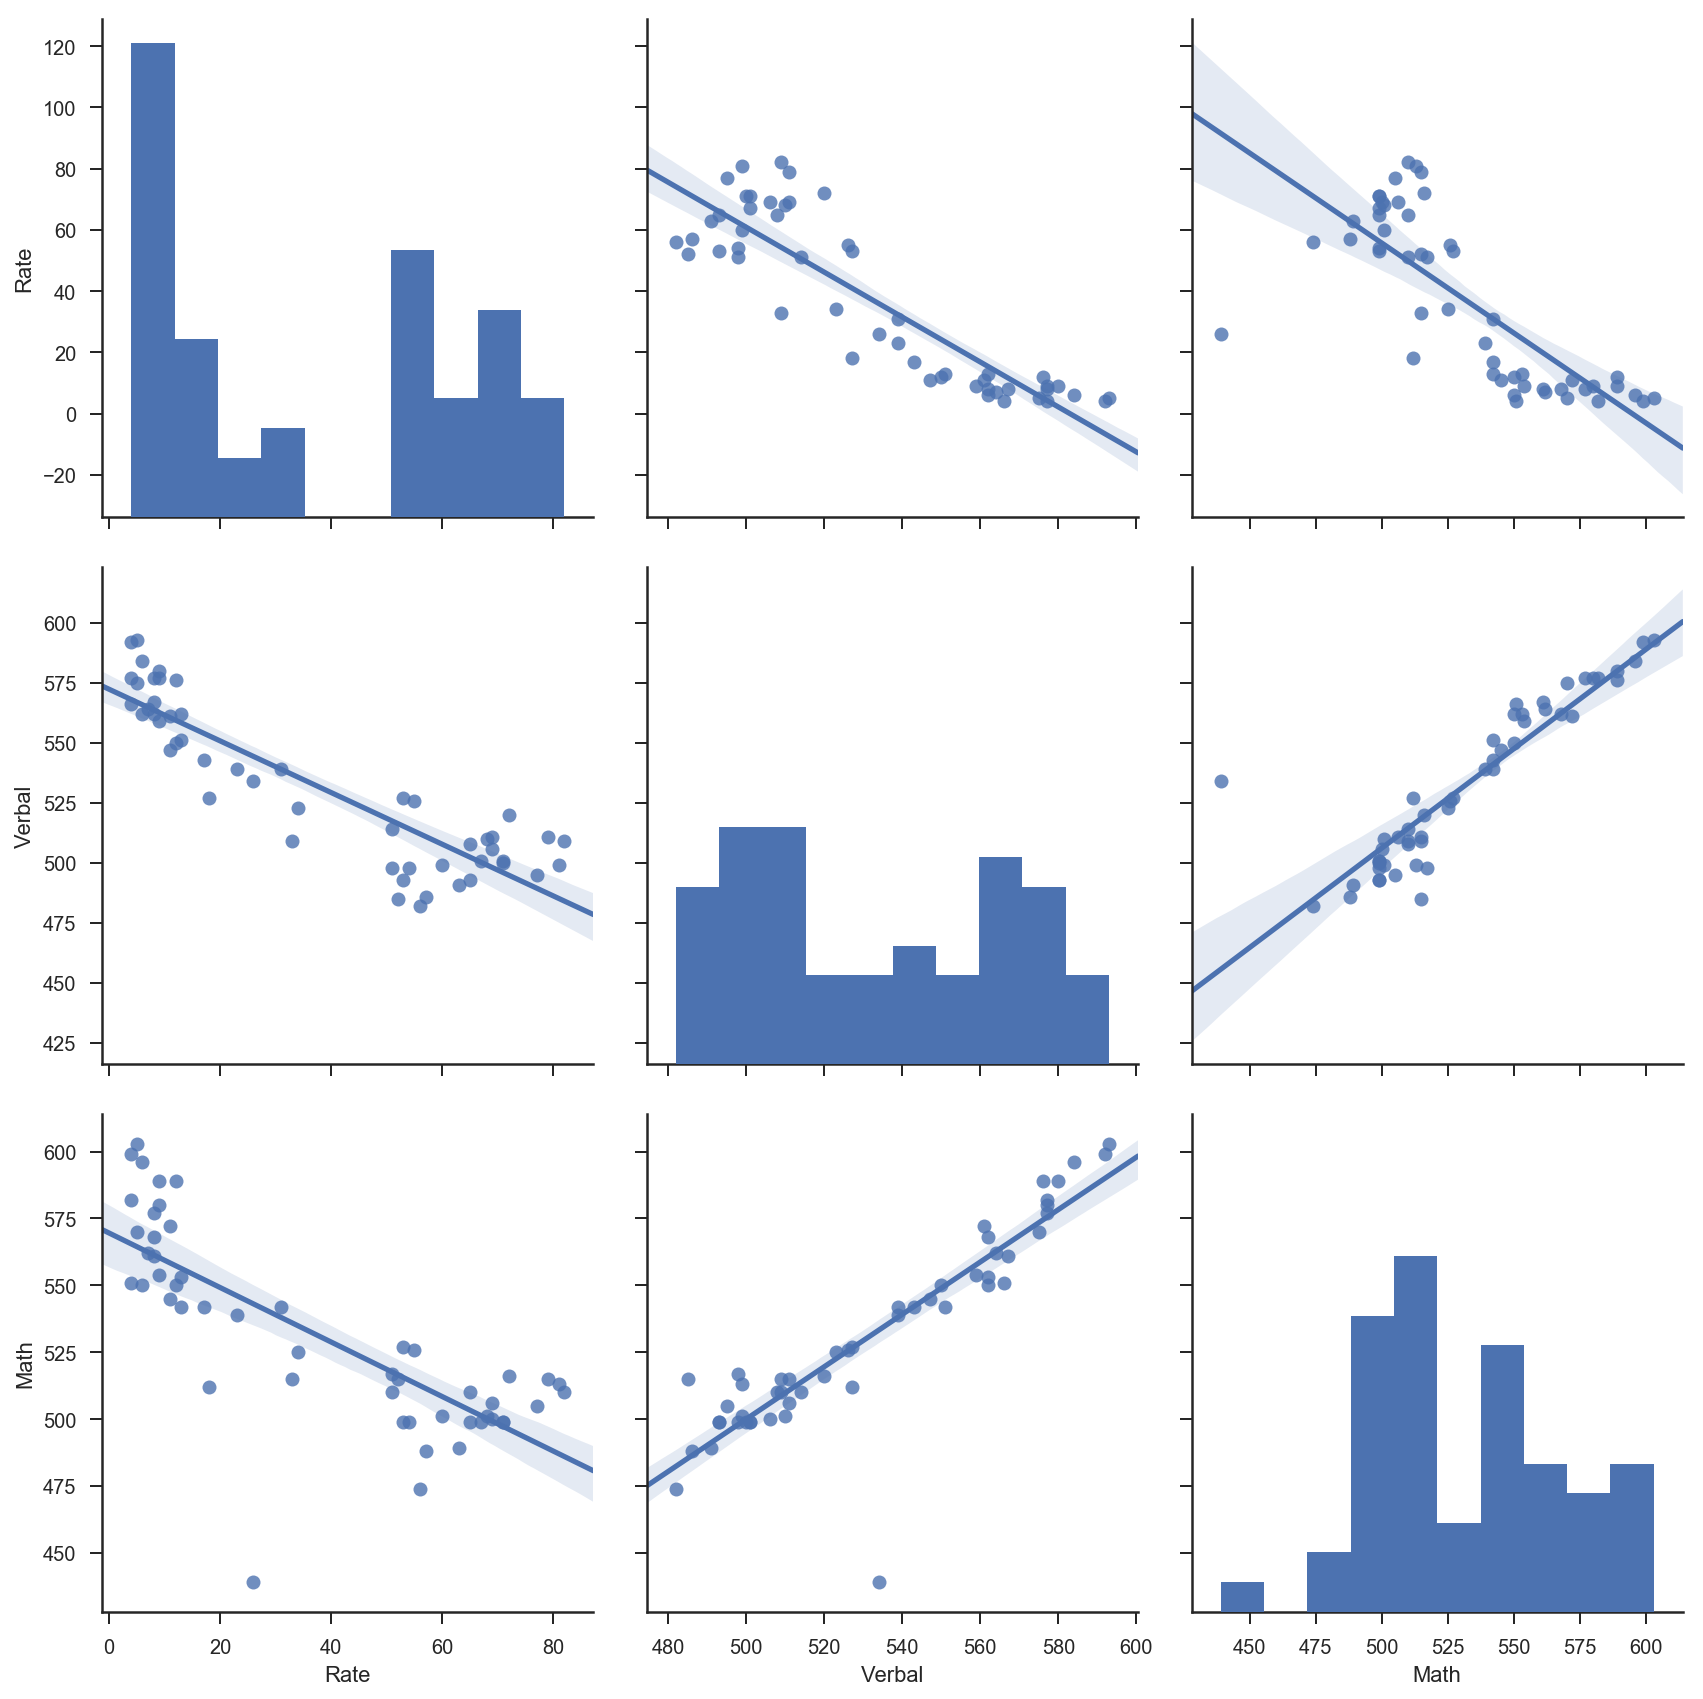

In [87]:
sns.set(style="ticks", color_codes=True)

ax = sns.pairplot(df, size=4, kind="reg") #ADJUST TICKS AND LABELS AND COLORS

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 4. Plot the data using built-in pandas functions.

---

Pandas is very powerful and contains a variety of nice, built-in plotting functions for your data. Read the documentation here to understand the capabilities:

http://pandas.pydata.org/pandas-docs/stable/visualization.html

### 4.1 Plot a stacked histogram with `Verbal` and `Math` using pandas

In [68]:
#ax = df.plot(kind='bar', stacked=True, figsize=(16, 8))

Text(0,0.5,u'Frequency')

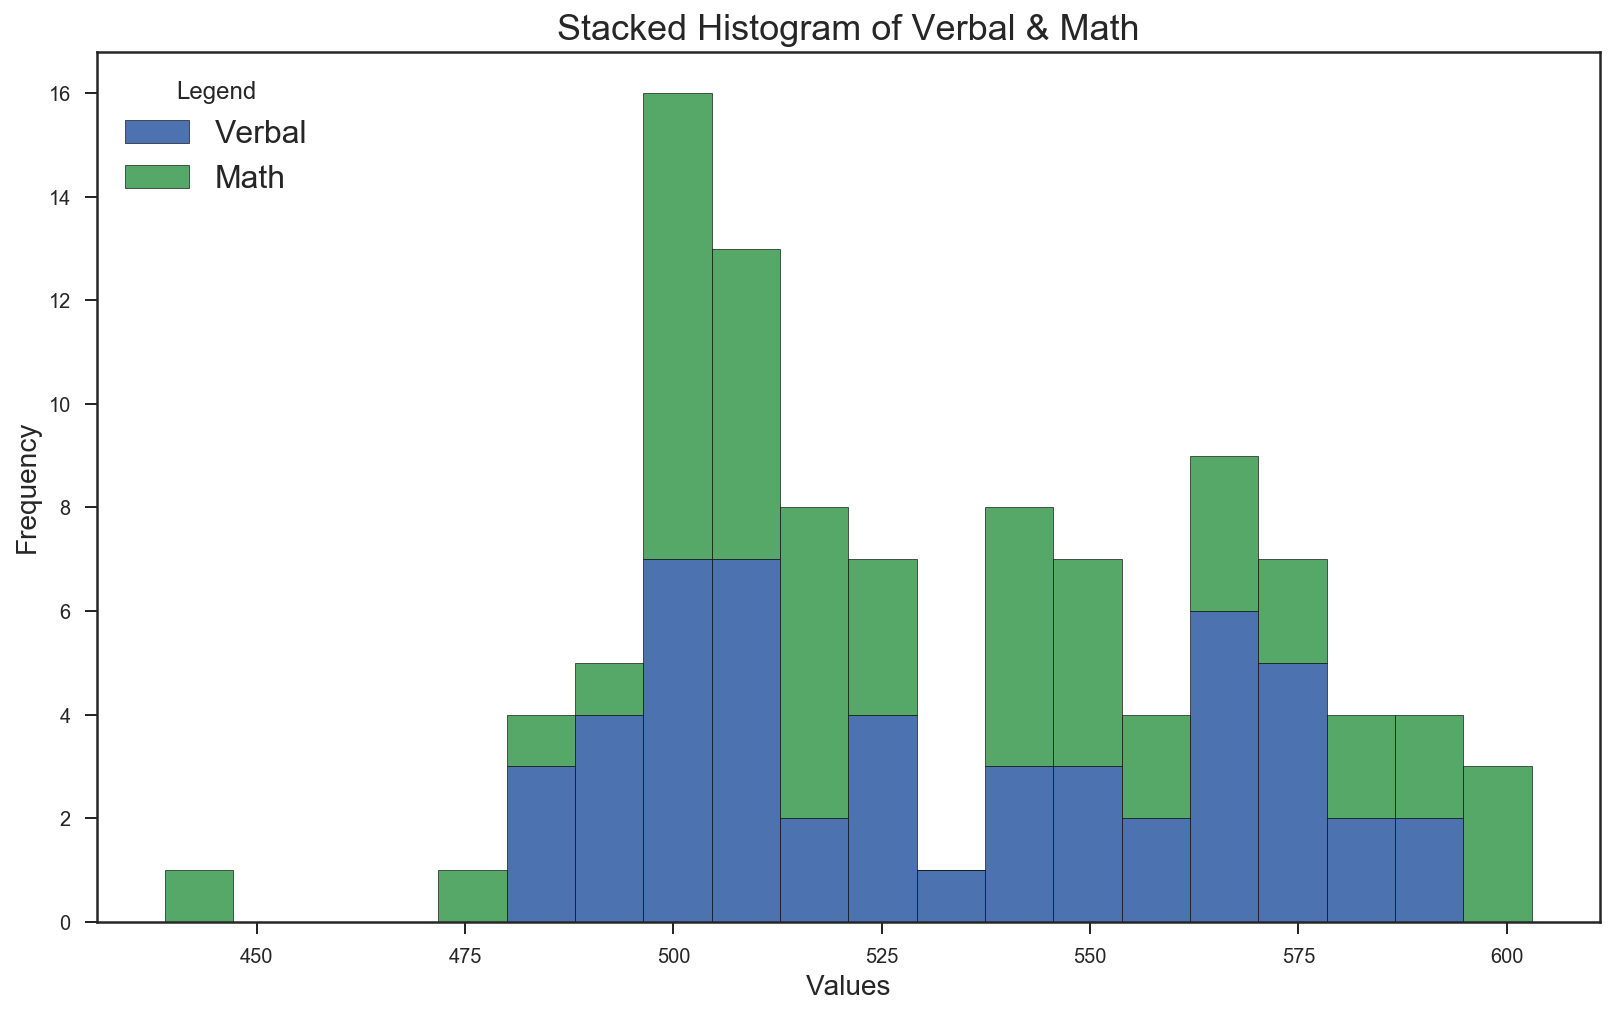

In [110]:
plt.style.use('seaborn-ticks')
ax = df[['Verbal', 'Math']].plot(kind='hist', stacked=True, figsize=(12, 8), bins=20, edgecolor='black')
ax.set_title('Stacked Histogram of Verbal & Math', fontsize=18)
ax.legend(title='Legend', loc='upper left', prop={'size': 16})
ax.set_xlabel('Values', fontsize=14)
ax.set_ylabel('Frequency',fontsize=14)


### 4.2 Plot `Verbal` and `Math` on the same chart using boxplots

What are the benefits of using a boxplot as compared to a scatterplot or a histogram?

What's wrong with plotting a box-plot of `Rate` on the same chart as `Math` and `Verbal`?

Text(0,0.5,u'Values')

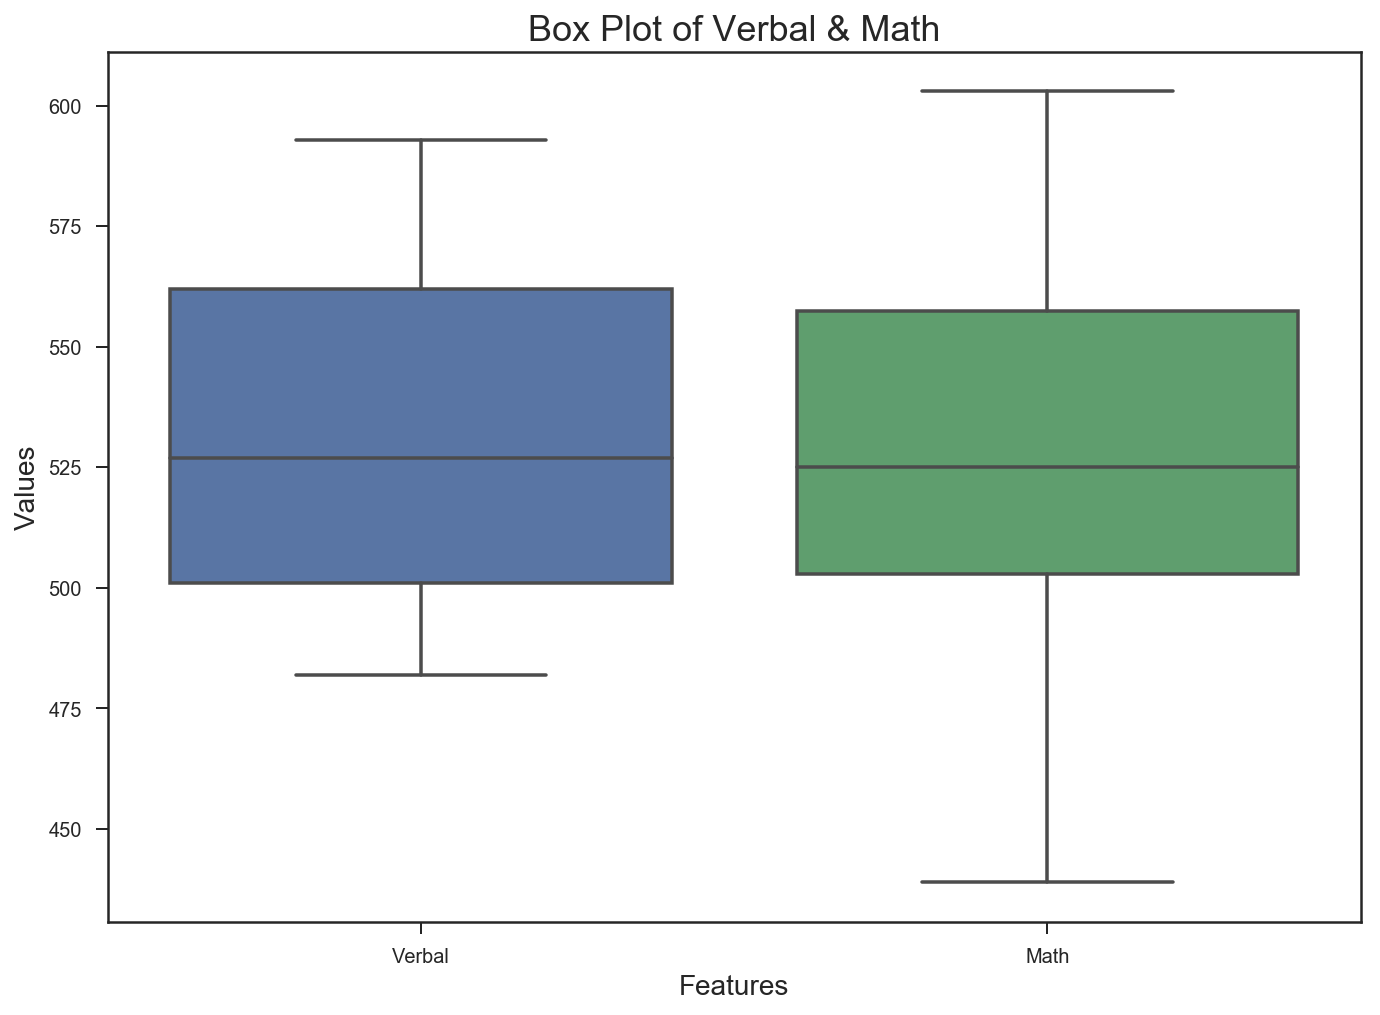

In [115]:
plt.style.use('seaborn-ticks')
plt.figure(figsize=(10,8))

#ax = df[['Verbal', 'Math']].plot(kind='box',figsize=(12, 8))

ax = sns.boxplot(data=df[['Verbal', 'Math']])
ax.set_title('Box Plot of Verbal & Math', fontsize=18)

ax.set_xlabel('Features', fontsize=14)
ax.set_ylabel('Values',fontsize=14)

<img src="http://imgur.com/xDpSobf.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 4.3 Plot `Verbal`, `Math`, and `Rate` appropriately on the same boxplot chart

Think about how you might change the variables so that they would make sense on the same chart. Explain your rationale for the choices on the chart. You should strive to make the chart as intuitive as possible. 


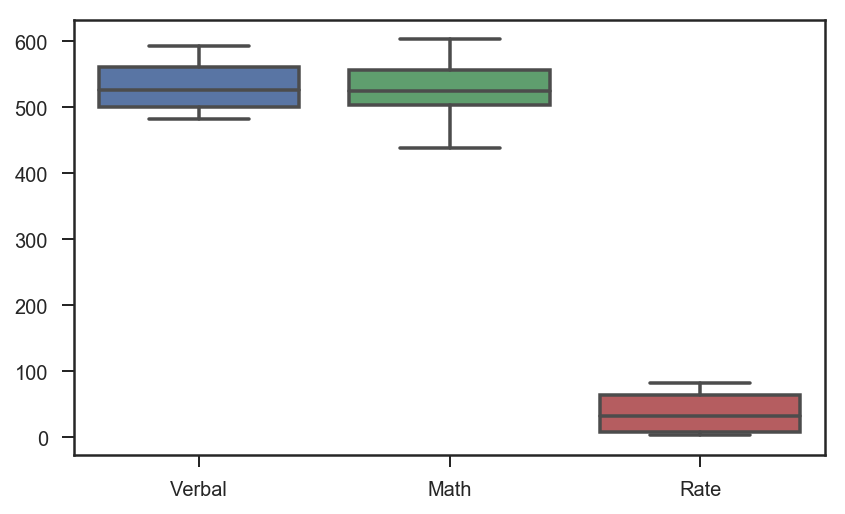

In [140]:
#IF we just plotted the data As-Is
sns.boxplot(data=df[['Verbal', 'Math', 'Rate']])

# 1) The Scales of the data dont match.
# 2) Rate is a Percentage (Will never have a % more than 100)
# 3) We have to adjust the scales to compare things logically & visually

In [123]:
#Normalize everything using Min Max [0-1] - As the data has almost no outliers.
df_norm = df[['Rate', 'Verbal', 'Math']]
df_norm = ((df_norm - df_norm.min())/(df_norm.max()-df_norm.min()))

Text(0,0.5,u'Normalized Values')

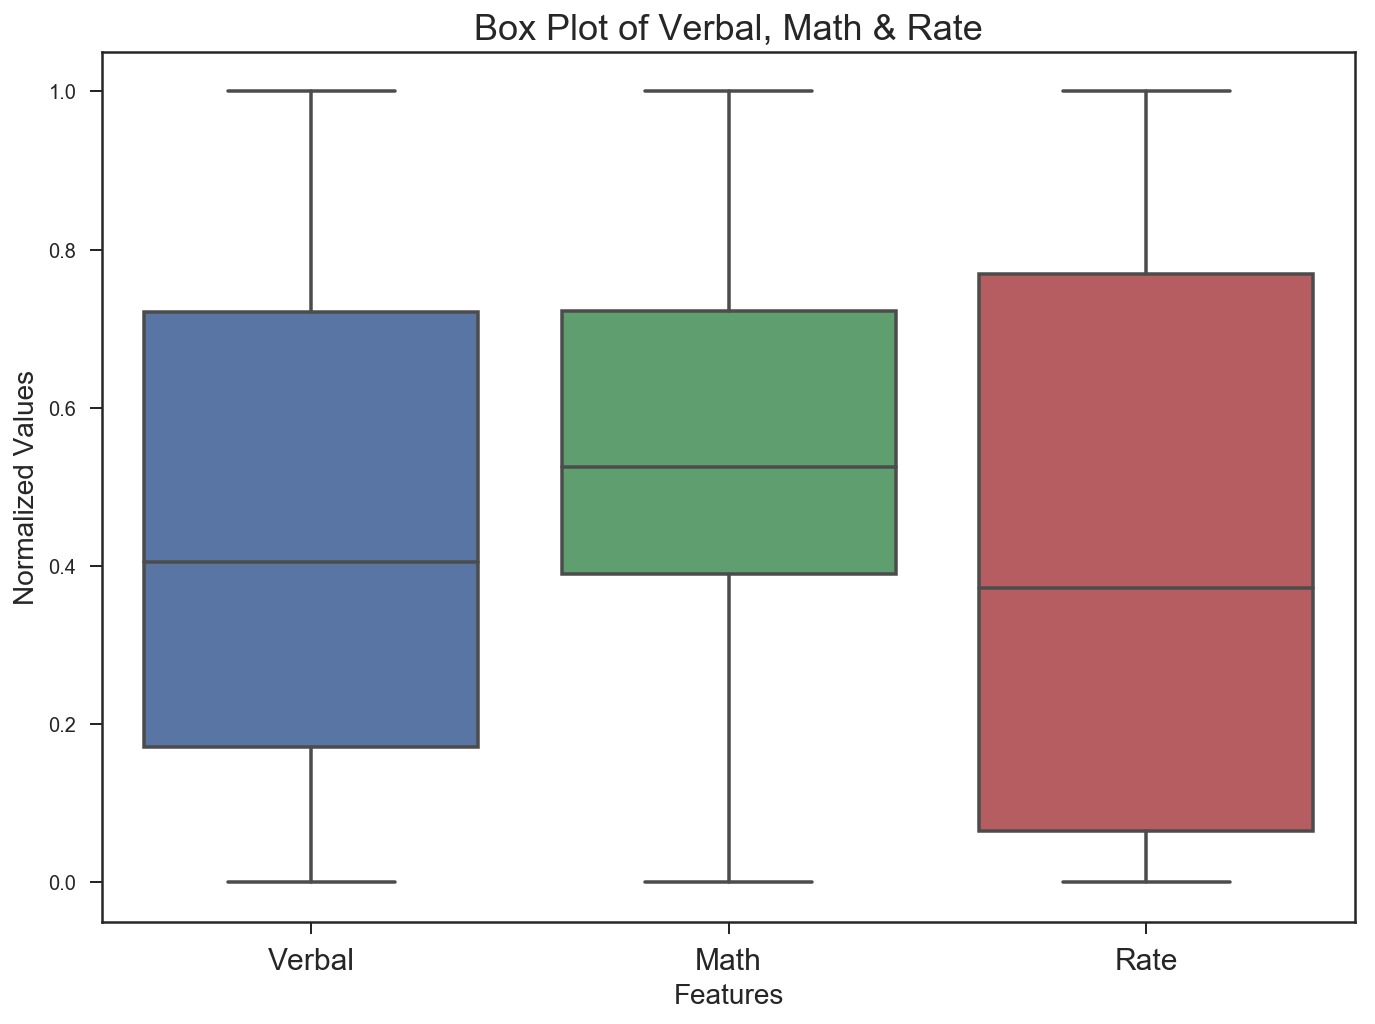

In [139]:
plt.style.use('seaborn-ticks')
plt.figure(figsize=(10,8))

#ax = df[['Verbal', 'Math']].plot(kind='box',figsize=(12, 8))

ax = sns.boxplot(data=df_norm[['Verbal', 'Math', 'Rate']])
ax.set_title('Box Plot of Verbal, Math & Rate', fontsize=18)
ax.set_xlabel('Features', fontsize=14)
ax.set_xticklabels(['Verbal','Math','Rate'], fontsize=15)
ax.set_ylabel('Normalized Values',fontsize=14)

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 5. Create and examine subsets of the data

---

For these questions you will practice **masking** in pandas. Masking uses conditional statements to select portions of your DataFrame (through boolean operations under the hood.)

Remember the distinction between DataFrame indexing functions in pandas:

    .iloc[row, col] : row and column are specified by index, which are integers
    .loc[row, col]  : row and column are specified by string "labels" (boolean arrays are allowed; useful for rows)
    .ix[row, col]   : row and column indexers can be a mix of labels and integer indices
    
For detailed reference and tutorial make sure to read over the pandas documentation:

http://pandas.pydata.org/pandas-docs/stable/indexing.html



### 5.1 Find the list of states that have `Verbal` scores greater than the average of `Verbal` scores across states

How many states are above the mean? What does this tell you about the distribution of `Verbal` scores?




In [142]:
abv_mean = df[df['Verbal'] > df['Verbal'].mean()].count()[0]

print('{0} states are above the mean.'.format(abv_mean))

#Given that we have 51 states, the mean at 24 indicates that the data is symmetrical
# -> Looking at the distribution above, we see a bimodal distribution

24 states are above the mean.


### 5.2 Find the list of states that have `Verbal` scores greater than the median of `Verbal` scores across states

How does this compare to the list of states greater than the mean of `Verbal` scores? Why?

In [149]:
abv_med = df[df['Verbal'] > df['Verbal'].median()].count()[0]

print('{0} states are above the median.'.format(abv_med))

#Given that we have 51 states, the mean at 24 indicates that the data is symmetrical
# -> Looking at the distribution above, we see a bimodal distribution

24 states are above the median.


### 5.3 Create a column that is the difference between the `Verbal` and `Math` scores

Specifically, this should be `Verbal - Math`.

In [173]:
df['Verbal - Math'] = df['Verbal']-df['Math']

df

,State,Rate,Verbal,Math,Verbal - Math
0,CT,82,509,510,-1
1,NJ,81,499,513,-14
2,MA,79,511,515,-4
3,NY,77,495,505,-10
4,NH,72,520,516,4
5,RI,71,501,499,2
6,PA,71,500,499,1
7,VT,69,511,506,5
8,ME,69,506,500,6
9,VA,68,510,501,9


### 5.4 Create two new DataFrames showing states with the greatest difference between scores

1. Your first DataFrame should be the 10 states with the greatest gap between `Verbal` and `Math` scores where `Verbal` is greater than `Math`. It should be sorted appropriately to show the ranking of states.
2. Your second DataFrame will be the inverse: states with the greatest gap between `Verbal` and `Math` such that `Math` is greater than `Verbal`. Again, this should be sorted appropriately to show rank.
3. Print the header of both variables, only showing the top 3 states in each.

In [203]:
## +VE Difference

df[['State','Verbal - Math']].sort_values(by='Verbal - Math', ascending=False).head(10)

,State,Verbal - Math
27,OH,95
50,MS,15
29,WV,15
45,AR,12
31,TN,9
9,VA,9
32,NM,9
16,DC,8
8,ME,6
41,OK,6


In [204]:
## -VE DIFFERENCE

df[['State','Verbal - Math']].sort_values(by='Verbal - Math', ascending=True).head(10)

,State,Verbal - Math
21,HI,-30
23,CA,-19
1,NJ,-14
33,IL,-13
44,WI,-12
36,MI,-11
3,NY,-10
47,IA,-10
37,MN,-9
49,ND,-7


In [207]:
pos_diff = df[['State','Verbal - Math']].sort_values(by='Verbal - Math', ascending=False).head(3)
pos_diff

,State,Verbal - Math
27,OH,95
50,MS,15
29,WV,15


In [208]:
neg_diff = df[['State','Verbal - Math']].sort_values(by='Verbal - Math', ascending=True).head(3)
neg_diff

,State,Verbal - Math
21,HI,-30
23,CA,-19
1,NJ,-14


## 6. Examine summary statistics

---

Checking the summary statistics for data is an essential step in the EDA process!

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 6.1 Create the correlation matrix of your variables (excluding `State`).

What does the correlation matrix tell you?


In [219]:
df.corr() ##DEFAULT METHOD IS PEARSON
#### HEATMAP VIZ #####

## WHAT DOES IT MEAN?

,Rate,Verbal,Math,Verbal - Math
Rate,1.000000,-0.888121,-0.773419,-0.098671
Verbal,-0.888121,1.000000,0.899909,0.044527
Math,-0.773419,0.899909,1.000000,-0.395574
Verbal - Math,-0.098671,0.044527,-0.395574,1.000000


In [220]:
df.corr(method='pearson') 

,Rate,Verbal,Math,Verbal - Math
Rate,1.000000,-0.888121,-0.773419,-0.098671
Verbal,-0.888121,1.000000,0.899909,0.044527
Math,-0.773419,0.899909,1.000000,-0.395574
Verbal - Math,-0.098671,0.044527,-0.395574,1.000000


<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 6.2 Use pandas'  `.describe()` built-in function on your DataFrame

Write up what each of the rows returned by the function indicate.

In [213]:
df.describe()

## WRITE UP

,Rate,Verbal,Math,Verbal - Math
count,51.000000,51.000000,51.000000,51.000000
mean,37.000000,532.529412,531.843137,0.686275
std,27.550681,33.360667,36.287393,15.839811
min,4.000000,482.000000,439.000000,-30.000000
25%,9.000000,501.000000,503.000000,-6.000000
50%,33.000000,527.000000,525.000000,0.000000
75%,64.000000,562.000000,557.500000,4.500000
max,82.000000,593.000000,603.000000,95.000000


<img src="http://imgur.com/xDpSobf.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 6.3 Assign and print the _covariance_ matrix for the dataset

1. Describe how the covariance matrix is different from the correlation matrix.
2. What is the process to convert the covariance into the correlation?
3. Why is the correlation matrix preferred to the covariance matrix for examining relationships in your data?

In [216]:
df_cov_matrix = df.cov()

#print(df_cov_matrix)
df_cov_matrix

,Rate,Verbal,Math,Verbal - Math
Rate,759.04,-816.280000,-773.220000,-43.060000
Verbal,-816.28,1112.934118,1089.404706,23.529412
Math,-773.22,1089.404706,1316.774902,-227.370196
Verbal - Math,-43.06,23.529412,-227.370196,250.899608


<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 7. Performing EDA on "drug use by age" data.

---

You will now switch datasets to one with many more variables. This section of the project is more open-ended - use the techniques you practiced above!

We'll work with the "drug-use-by-age.csv" data, sourced from and described here: https://github.com/fivethirtyeight/data/tree/master/drug-use-by-age.

### 7.1

Load the data using pandas. Does this data require cleaning? Are variables missing? How will this affect your approach to EDA on the data?

### 7.2 Do a high-level, initial overview of the data

Get a feel for what this dataset is all about.

Use whichever techniques you'd like, including those from the SAT dataset EDA. The final response to this question should be a written description of what you infer about the dataset.

Some things to consider doing:

- Look for relationships between variables and subsets of those variables' values
- Derive new features from the ones available to help your analysis
- Visualize everything!

### 7.3 Create a testable hypothesis about this data

Requirements for the question:

1. Write a specific question you would like to answer with the data (that can be accomplished with EDA).
2. Write a description of the "deliverables": what will you report after testing/examining your hypothesis?
3. Use EDA techniques of your choice, numeric and/or visual, to look into your question.
4. Write up your report on what you have found regarding the hypothesis about the data you came up with.


Your hypothesis could be on:

- Difference of group means
- Correlations between variables
- Anything else you think is interesting, testable, and meaningful!

**Important notes:**

You should be only doing EDA _relevant to your question_ here. It is easy to go down rabbit holes trying to look at every facet of your data, and so we want you to get in the practice of specifying a hypothesis you are interested in first and scoping your work to specifically answer that question.

Some of you may want to jump ahead to "modeling" data to answer your question. This is a topic addressed in the next project and **you should not do this for this project.** We specifically want you to not do modeling to emphasize the importance of performing EDA _before_ you jump to statistical analysis.

** Question and deliverables**


...

In [19]:
# Code

**Report**



...

<img src="http://imgur.com/xDpSobf.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 8. Introduction to dealing with outliers

---

Outliers are an interesting problem in statistics, in that there is not an agreed upon best way to define them. Subjectivity in selecting and analyzing data is a problem that will recur throughout the course.

1. Pull out the rate variable from the sat dataset.
2. Are there outliers in the dataset? Define, in words, how you _numerically define outliers._
3. Print out the outliers in the dataset.
4. Remove the outliers from the dataset.
5. Compare the mean, median, and standard deviation of the "cleaned" data without outliers to the original. What is different about them and why?

<img src="http://imgur.com/GCAf1UX.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 9. Percentile scoring and spearman rank correlation

---

### 9.1 Calculate the spearman correlation of sat `Verbal` and `Math`

1. How does the spearman correlation compare to the pearson correlation? 
2. Describe clearly in words the process of calculating the spearman rank correlation.
  - Hint: the word "rank" is in the name of the process for a reason!


### 9.2 Percentile scoring

Look up percentile scoring of data. In other words, the conversion of numeric data to their equivalent percentile scores.

http://docs.scipy.org/doc/numpy-dev/reference/generated/numpy.percentile.html

http://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.percentileofscore.html

1. Convert `Rate` to percentiles in the sat scores as a new column.
2. Show the percentile of California in `Rate`.
3. How is percentile related to the spearman rank correlation?

### 9.3 Percentiles and outliers

1. Why might percentile scoring be useful for dealing with outliers?
2. Plot the distribution of a variable of your choice from the drug use dataset.
3. Plot the same variable but percentile scored.
4. Describe the effect, visually, of coverting raw scores to percentile.